Name: Kevin Zhang

## COMP4220: Machine Learning, Fall 2020, Assignment 2


Due: Monday, September 28, 10pm

Please submit one pdf file for all questions.

1. Suppose you are using Polynomial Regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this? When there is a large gap between the training error and the validation error during polynomial regression, what is happening is that the model is performing significantly better on the training data then on the validation data, which makes it an overfitting model. One way to solve this problem is to use a larger training set, which would cause the gap to shorten. Another way to fix this issue is to constrain the model and reduce the degrees of freedom it has. The third way to solve this problem is to reduce the model's complexity, which will reduce the variance of the model and therefore reduce the overfitting of the training data.

2. How does the Stochastic Gradient Descent algorithm work? Stochastic Gradient Descent works by picking a random instance at every step in the training set and it computes gradients based only on that instance. This makes the algorithm much faster because it is only working on a single instance at a time. During the process, the training instances must be independent and identically distributed in order to make sure that the parameters get pulled toward their global optimum. This is done by shuffling the instances while training or shuffling the training set at the beginning of each epoch.Stochastic Gradient Descent has a much better chance of finding global minimum than the Batch Gradient Descent.Stochastic gradient descent can be implemented using a simple learning schedule.

3. Programming assignment (Linear Regression)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

Task: Create a two-dimensional plot of regression. This example only uses the first feature of the diabetes dataset, in order to illustrate a two-dimensional plot of linear regression.

In [ ]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [ ]:
# P3.1: Find the number of data instances and features in this data set  
#diabetes_X
print("Number of data instances in diabetes_X is: ", diabetes_X.size)
print(diabetes_X)
print("Number of data instances in diabetes_y is: ", diabetes_y.size)
print(diabetes_y)

Number of data instances in diabetes_X is:  4420
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
Number of data instances in diabetes_y is:  442
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143. 

In [ ]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]
diabetes_X.shape

(442, 1)

In [ ]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [ ]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [ ]:
# P3.2: Create linear regression object
regr = linear_model.LinearRegression()

In [ ]:
# P3.3: Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# P3.4: Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_y_test.reshape(-1, 1))
diabetes_x_pred = regr.predict(diabetes_X_test.reshape(-1, 1))

In [ ]:
# P3.5: Print the coefficients and intercept
coefficients = regr.coef_
intercept = regr.intercept_
print(coefficients)
print(intercept)

[938.23786125]
152.91886182616167


Text(0, 0.5, 'y-axis data')

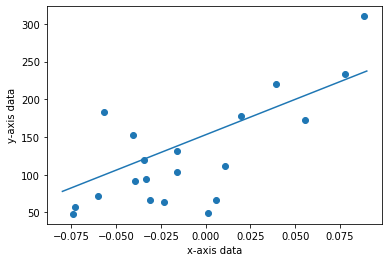

In [ ]:
# P3.6: Plot the test data points using plt.scatter and draw "Line of Best Fit" using plt.plot()
# Make sure that you label both axes with appropriate names and save the figure in the png format 
plt.scatter(diabetes_X_test, diabetes_y_test)
y=coefficients*[-0.08, 0.09]+intercept
plt.plot([-0.08, 0.09], y)
plt.xlabel('x-axis data')
plt.ylabel('y-axis data')

In [ ]:
# P3.7: We like to measure the generalization error for the trained model. You can find a wide range of evaluation
# metrics at https://scikit-learn.org/stable/modules/model_evaluation.html
# Pick only one suitable evaluation metric from this list and report the generalization error using the test data set

#I have chosen to find the mean absolute error regression loss in order to report on the generalization error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(diabetes_y_test, diabetes_y_pred)
#The mean absolute error regression loss is 118432.33695173563

118432.33695173563

4. Programming assignment (Polynomial Regression)

Polynomial Regression is appropriate when data are nonlinearly distributed (meaning you can’t ﬁt a straight line between y and x).

Polynomial Regression is linear with respect to coeﬃcients since we don’t have any power of the coeﬃcients (all the coeﬃcients are raised to the power of 1). However, Polynomial Regression is a nonlinear function of the input x, since we have the inputs raised to several powers. 

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the dataset
import io
from google.colab import files
uploaded = files.upload()
dataset=pd.read_csv(io.BytesIO(uploaded['Position_Salaries.csv']))
#dataset = pd.read_csv('Position_Salaries.csv') #the dataset is available in the folder of HW2 on Blackboard
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

Saving Position_Salaries.csv to Position_Salaries (1).csv


In [ ]:
# Training the Linear Regression model on the whole dataset
#from sklearn.linear_model import Linear_model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# P4.1: Training the Polynomial Regression model on the whole dataset (degree=3)

from sklearn.preprocessing import PolynomialFeatures
# Use "PolynomialFeatures" to generate polynomial features

# Solve the linear regression model using the polynomial features 
lin_reg_3=linear_model.LinearRegression()
lin_reg_3.fit(PolynomialFeatures(degree=3).fit_transform(X), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# P4.2: Training the Polynomial Regression model on the whole dataset (degree=4) as above and call the model lin_reg_4
lin_reg_4 = linear_model.LinearRegression()
lin_reg_4.fit(PolynomialFeatures(degree=4).fit_transform(X), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

NameError: ignored

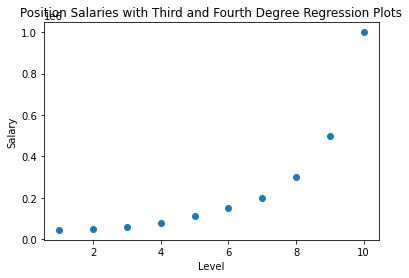

In [ ]:
# P4.3: Visualising the Linear Regression results
# Name both axes and don't forget to use "title" as we have several plots
plt.title("Position Salaries with Third and Fourth Degree Regression Plots")
plt.xlabel('Level')
plt.ylabel('Salary')
plt.scatter(X, y)
plt.plot(X_grid, lin_reg_3.predict(PolynomialFeatures(degree=3).fit_transform(X_grid)))
plt.plot(X_grid, lin_reg_4.predict(PolynomialFeatures(degree=4).fit_transform(X_grid)),color='red')

How do we ﬁnd the best degree?


The main form of ﬁnding a good ﬁt is to plot the model and see what it looks like visually. You simply test several degrees and you see which one gives you the best ﬁt. The other option is to ﬁnd the lowest root-mean-square error (RMSE) for your model, but in that case be careful not to overﬁt the data.


NameError: ignored

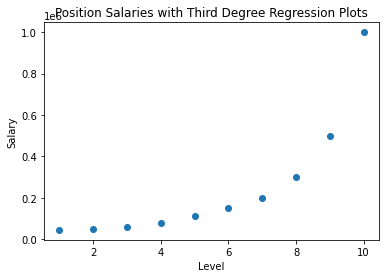

In [ ]:
# P4.4: Visualising the Polynomial Regression results (degree = 3)
# Name both axes and don't forget to use "title" as we have several plots 
plt.title("Position Salaries with Third Degree Regression Plots")
plt.xlabel('Level')
plt.ylabel('Salary')
plt.scatter(X, y)
plt.plot(X_grid, lin_reg_3.predict(PolynomialFeatures(degree=3).fit_transform(X_grid)))

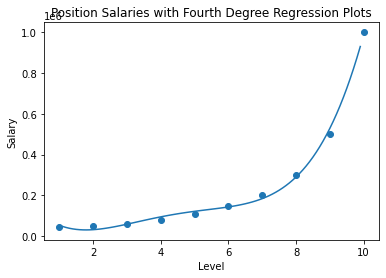

In [ ]:
# P4.5: Visualising the Polynomial Regression results (degree = 4)      
# Name both axes and don't forget to use "title" as we have several plots 
plt.title("Position Salaries with Fourth Degree Regression Plots")
plt.xlabel('Level')
plt.ylabel('Salary')
plt.scatter(X, y)
plt.plot(X_grid, lin_reg_4.predict(PolynomialFeatures(degree=4).fit_transform(X_grid)))

In [ ]:
# P4.6: Predicting a new result with Linear Regression when the input is x=19
y_with_19_years=lin_reg.predict([[19]])
print(y_with_19_years)

[1341363.63636364]


In [ ]:
# P4.7: Predicting a new result with Polynomial Regression(degree=3) when the input is x=19
y_with_19_years_3d = lin_reg_3.predict(PolynomialFeatures(degree=3).fit_transform([[19]]))
print(y_with_19_years_3d)


[14044517.48251697]


In [ ]:
# P4.8: Predicting a new result with Polynomial Regression(degree=4) when the input is x=19
y_with_19_years_4d = lin_reg_4.predict(PolynomialFeatures(degree=4).fit_transform([[19]]))
print(y_with_19_years_4d) 

[40328199.30072429]


In [ ]:
# P4.9: Please explain the impact of selecting an appropriate degree parameter 
# on generalization error based on the above values?
#In this case, it seems like the higher the degree parameter is for the model, 
#the higher the generalization error is when you predict the new result when
#the input is 19.